In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def transition_matrix(n):
    tm = np.zeros((n, n))
    np.fill_diagonal(tm, 0.2)
    tm[1:, :-1] += np.diag([0.8]*(n-1))
    tm[-1, -1] = 1
    tm[:-1, -1] = 0
    return tm

# Teste
transition_matrix(10)

array([[0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])

In [3]:
# Questão 2 - Propagação

In [4]:
def propagate(p0, k, tm):
    p = p0.copy()
    for _ in range(k):
        p = tm @ p
    return p

# Teste
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
propagate(p0, 30, tm)

array([1.07374182e-21, 1.28849019e-19, 7.47324310e-18, 2.79001076e-16,
       7.53302904e-15, 1.56687004e-13, 2.61145007e-12, 3.58141723e-11,
       4.11862982e-10, 1.00000000e+00])

In [5]:
#Questão 3: Gráfico de Probabilidades

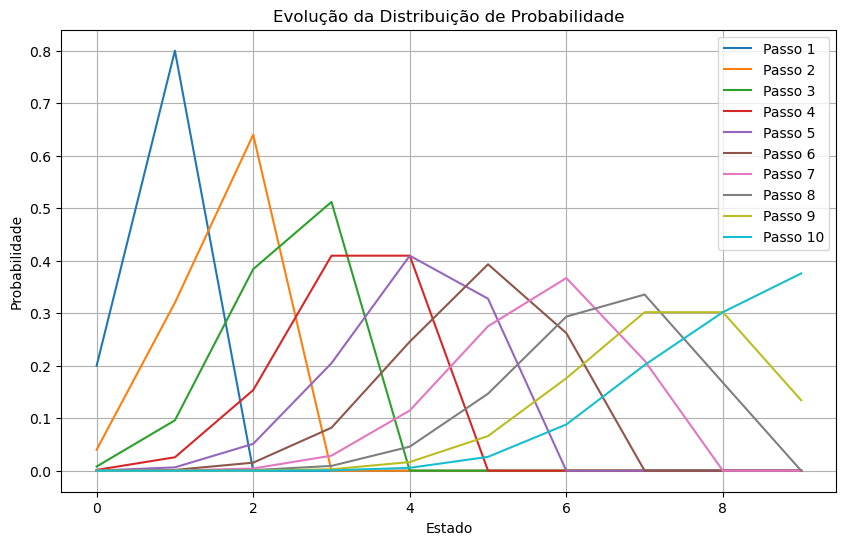

In [6]:
import matplotlib.pyplot as plt

# Configurações iniciais
n = 10
tm = transition_matrix(n)
p0 = np.zeros(n)
p0[0] = 1  # Começa no estado 0

# Plotar para cada passo de 1 a 10
plt.figure(figsize=(10, 6))
for step in range(1, 11):
    pk = propagate(p0.copy(), step, tm)
    plt.plot(pk, label=f'Passo {step}')

plt.xlabel('Estado')
plt.ylabel('Probabilidade')
plt.title('Evolução da Distribuição de Probabilidade')
plt.legend()
plt.grid(True)
plt.savefig("qsn3.png")
plt.show()

In [7]:
#Questão 4: Passos até 50%

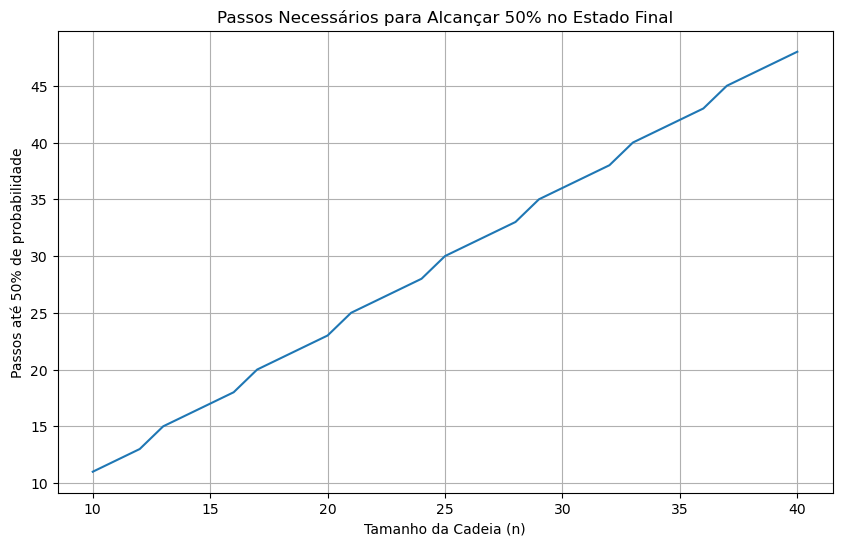

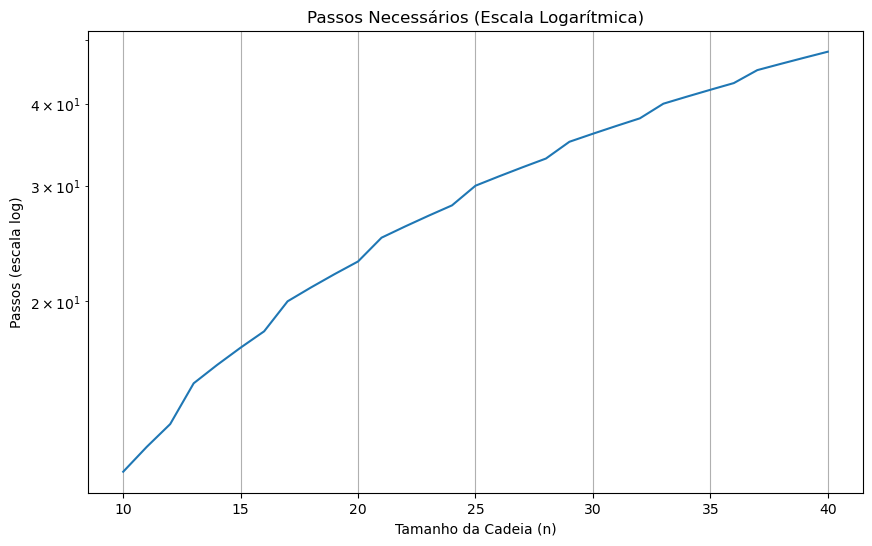

In [8]:
#Partes a e b:
def num_steps(n):
    tm = transition_matrix(n)
    p0 = np.zeros(n)
    p0[0] = 1
    k = 0
    while True:
        pk = propagate(p0.copy(), k, tm)
        if pk[-1] >= 0.5:
            return k
        k += 1

# Teste
num_steps(10)

#Parte C
n_values = range(10, 41)
steps = [num_steps(n) for n in n_values]

# Plot normal
plt.figure(figsize=(10, 6))
plt.plot(n_values, steps)
plt.xlabel('Tamanho da Cadeia (n)')
plt.ylabel('Passos até 50% de probabilidade')
plt.title('Passos Necessários para Alcançar 50% no Estado Final')
plt.grid(True)
plt.savefig("qsn4c.png")
plt.show()

# Plot semilogy
plt.figure(figsize=(10, 6))
plt.semilogy(n_values, steps)
plt.xlabel('Tamanho da Cadeia (n)')
plt.ylabel('Passos (escala log)')
plt.title('Passos Necessários (Escala Logarítmica)')
plt.grid(True)
plt.savefig("qsn4c_semilogy.png")
plt.show()

In [9]:
#Questão 5: Amostras

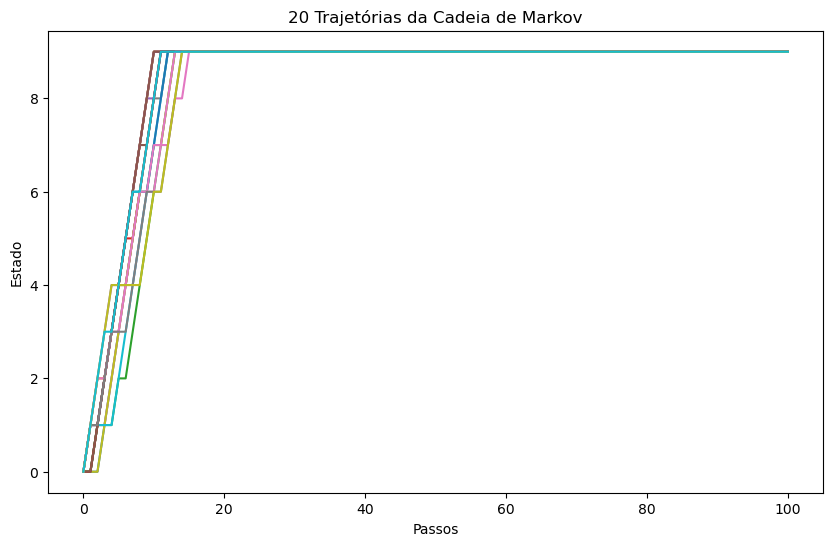

In [10]:
def sample(tm, k, s0):
    states = [s0]
    current_state = s0
    n = tm.shape[0]
    
    for _ in range(k):
        current_state = np.random.choice(n, p=tm[:, current_state])
        states.append(current_state)
    
    return states

# Teste e plot
tm = transition_matrix(10)
plt.figure(figsize=(10, 6))
for _ in range(20):
    states = sample(tm, 100, 0)
    plt.plot(states)
plt.xlabel('Passos')
plt.ylabel('Estado')
plt.title('20 Trajetórias da Cadeia de Markov')
plt.savefig("qsn5.png")
plt.show()

In [11]:
#Questão 6: Progresso Médio

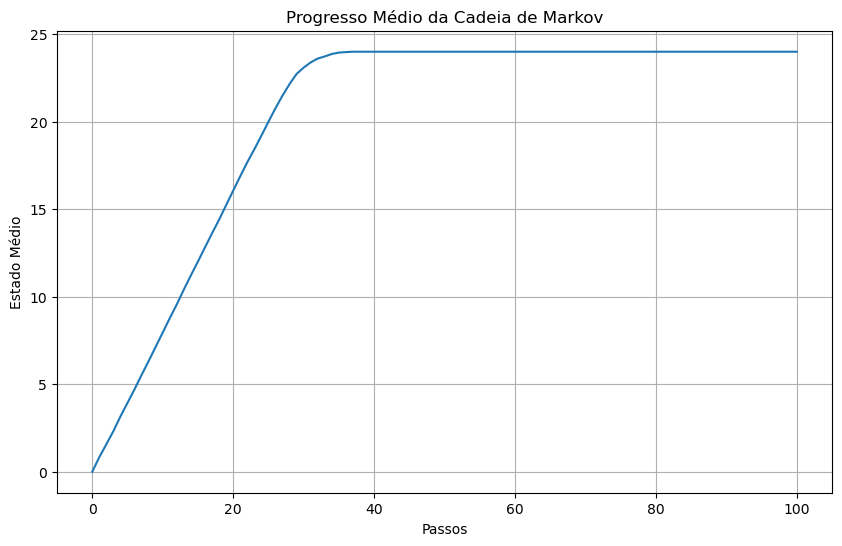

In [12]:
n = 25
tm = transition_matrix(n)
num_samples = 100  # Reduzido para executar mais rápido no notebook
steps = 100

all_trajectories = np.zeros((num_samples, steps+1))

for i in range(num_samples):
    all_trajectories[i] = sample(tm, steps, 0)

average_states = np.mean(all_trajectories, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_states)
plt.xlabel('Passos')
plt.ylabel('Estado Médio')
plt.title('Progresso Médio da Cadeia de Markov')
plt.grid(True)
plt.savefig("qsn6.png")
plt.show()

In [13]:
#Questão 7: Comparação

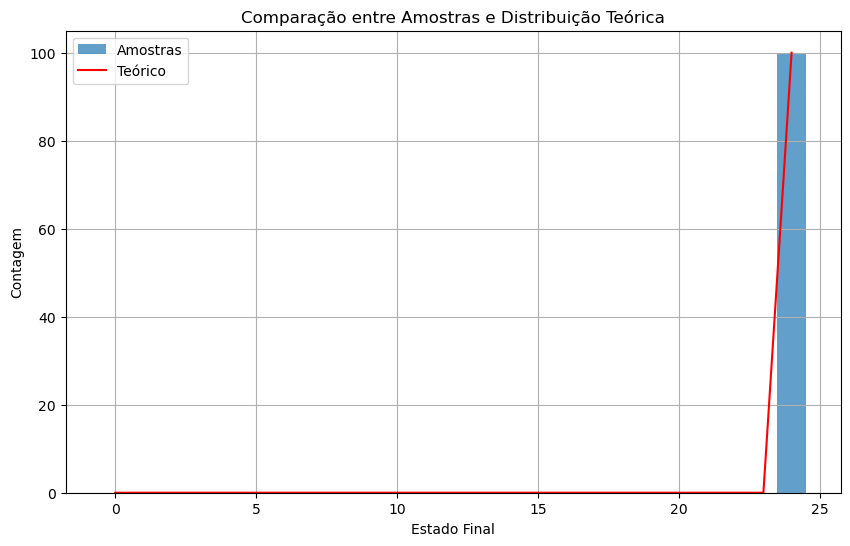

In [14]:
n = 25
tm = transition_matrix(n)
num_samples = 100  # Reduzido para o notebook
steps = 100

final_states = []
for _ in range(num_samples):
    states = sample(tm, steps, 0)
    final_states.append(states[-1])

p0 = np.zeros(n)
p0[0] = 1
pk = propagate(p0, steps, tm)
expected = pk * num_samples

plt.figure(figsize=(10, 6))
plt.hist(final_states, bins=np.arange(-0.5, n, 1), alpha=0.7, label='Amostras')
plt.plot(np.arange(n), expected, 'r-', label='Teórico')
plt.xlabel('Estado Final')
plt.ylabel('Contagem')
plt.title('Comparação entre Amostras e Distribuição Teórica')
plt.legend()
plt.grid(True)
plt.savefig("qsn7.png")
plt.show()